In [4]:
import os, json, cv2, random, pathlib, shutil
import numpy as np
import matplotlib.pyplot as plt


def random_color() -> list:
    return [random.randint(0, 255), random.randint(0, 255), random.randint(0, 255)]


def multiply_odds_evens(lst, x, y):
    for i in range(len(lst)):
        if i % 2 == 0:  # even index
            lst[i] = round(lst[i] * x, 0)
        else:  # odd index
            lst[i] = round(lst[i] * y, 0)
    return lst


def yolo_to_coco(x_center, y_center, width, height):
    x = int(x_center - (width / 2))
    y = int(y_center - (height / 2))

    return x, y, int(width), int(height)


def draw_bboxs(img_filename, bboxs, texts, thickness=1):
    img = cv2.imread(img_filename)

    height = img.shape[0]
    width = img.shape[1]

    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    tl = thickness
    tf = max(tl - 1, 1)
    for p, text in zip(bboxs, texts):
        # scale up annotation to original size
        print(f"Before scale: x_c:{p[0]}, y_c:{p[1]}, w:{p[2]}, h:{p[3]}")
        multiply_odds_evens(p, width, height)
        color = random_color()
        print(f"Before conversion: x_c:{p[0]}, y_c:{p[1]}, w:{p[2]}, h:{p[3]}")
        x, y, w, h = yolo_to_coco(p[0], p[1], p[2], p[3])
        print(f"After conversion: x: {x}, y:{y}, w:{w}, h:{h}")
        cv2.rectangle(
            img,
            pt1=(x, y),
            pt2=(x + w, y + h),
            color=color,
            thickness=thickness,
            lineType=cv2.LINE_AA,
        )
        t_size = cv2.getTextSize(text, 0, fontScale=tl / 3, thickness=thickness)[0]
        c1 = (x, y)
        c2 = c1[0] + t_size[0], c1[1] - t_size[1] - 3
        cv2.rectangle(
            img, c1, c2, color=color, thickness=-1, lineType=cv2.LINE_AA
        )  # filled
        cv2.putText(
            img,
            text,
            (c1[0], c1[1] - 2),
            0,
            tl / 3,
            [255, 255, 255],
            thickness=tf,
            lineType=cv2.LINE_AA,
        )
    return img

Before scale: x_c:0.926389, y_c:0.685547, w:0.919097, h:0.686523
Before conversion: x_c:2668.0, y_c:1404.0, w:2647.0, h:1406.0
After conversion: x: 1344, y:701, w:2647, h:1406
Before scale: x_c:0.629514, y_c:0.704102, w:0.620486, h:0.705078
Before conversion: x_c:1813.0, y_c:1442.0, w:1787.0, h:1444.0
After conversion: x: 919, y:720, w:1787, h:1444
Before scale: x_c:0.403125, y_c:0.698242, w:0.389236, h:0.696777
Before conversion: x_c:1161.0, y_c:1430.0, w:1121.0, h:1427.0
After conversion: x: 600, y:716, w:1121, h:1427
Before scale: x_c:0.219097, y_c:0.682129, w:0.210417, h:0.682129
Before conversion: x_c:631.0, y_c:1397.0, w:606.0, h:1397.0
After conversion: x: 328, y:698, w:606, h:1397
Before scale: x_c:0.071181, y_c:0.678711, w:0.059028, h:0.678711
Before conversion: x_c:205.0, y_c:1390.0, w:170.0, h:1390.0
After conversion: x: 120, y:695, w:170, h:1390
Before scale: x_c:0.959722, y_c:0.385742, w:0.950347, h:0.385254
Before conversion: x_c:2764.0, y_c:790.0, w:2737.0, h:789.0
After

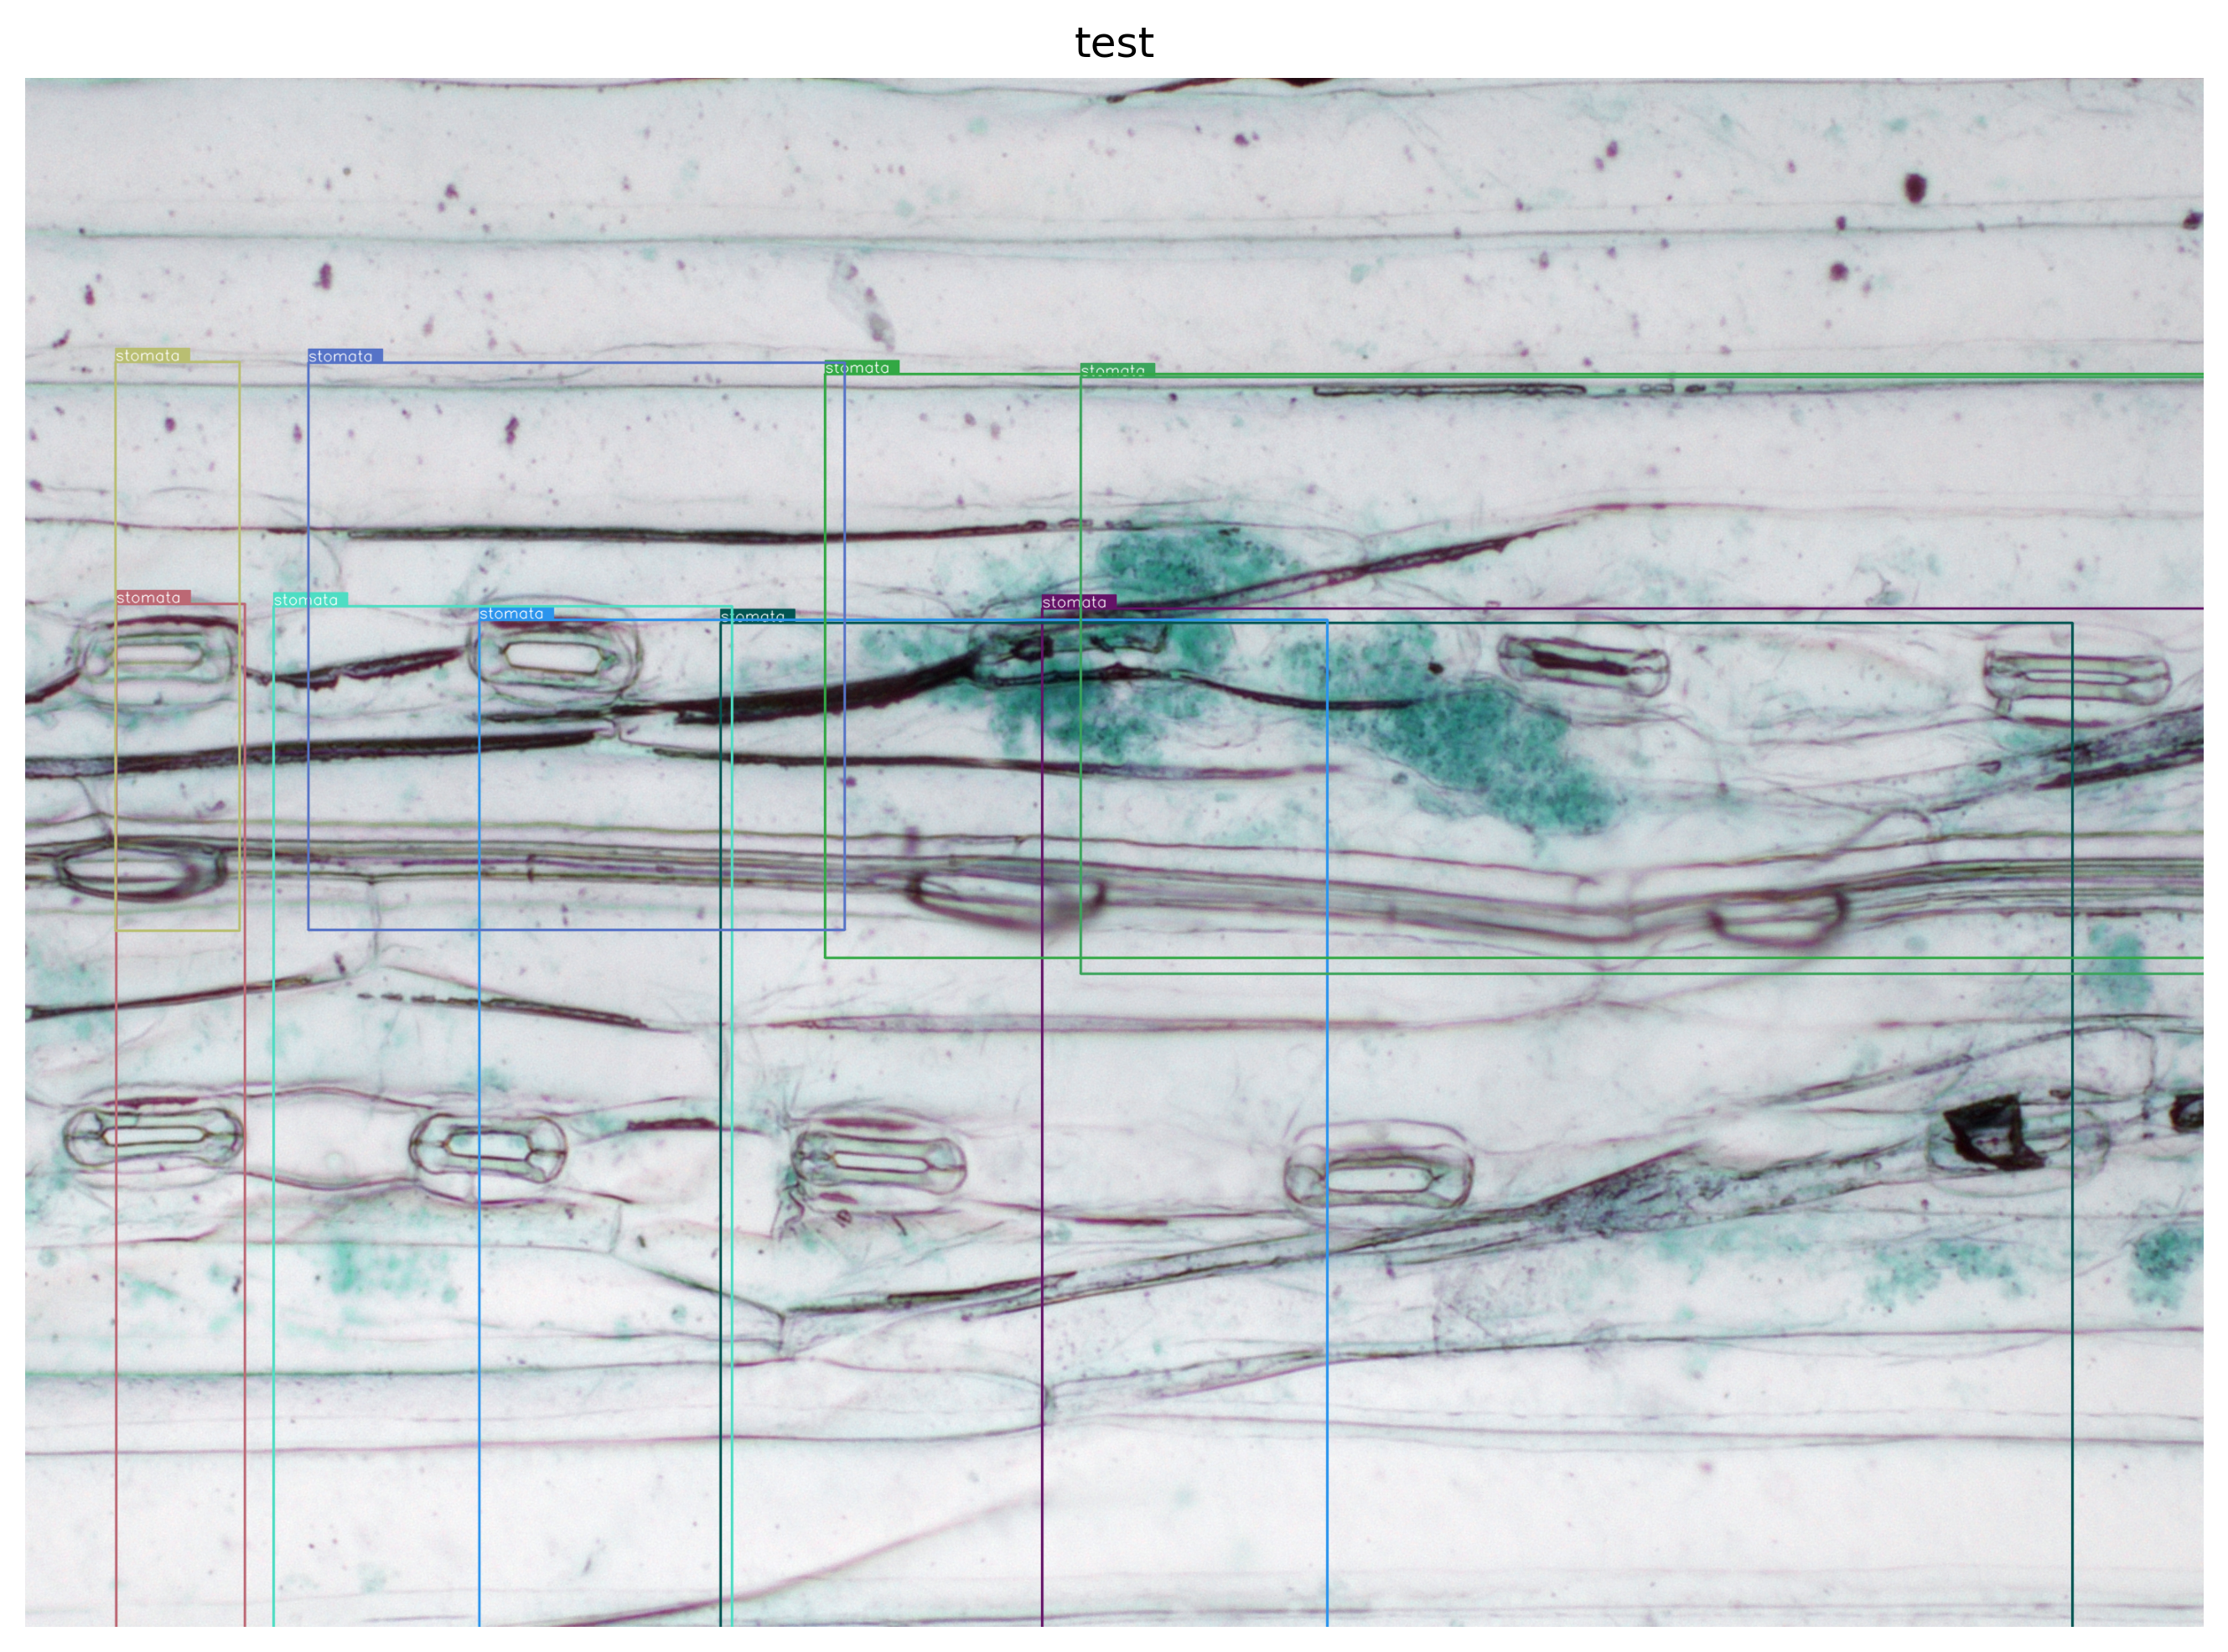

In [5]:
data_dir = "../../../google-drive/stomaVDP/2023-SAI-barley-33 copy"
img_dir = os.path.join(data_dir, "images", "val")
label_dir = os.path.join(data_dir, "labels", "val")

output_dir = "../outputs/"
isExist = os.path.exists(output_dir)
if not isExist:
    # Create a new directory because it does not exist
    os.makedirs(output_dir)
    print("output directory is created!")

# load image names
ext_map = {}
imgs = os.listdir(img_dir)
# extract file extension into a map
for img in imgs:
    img_name, img_ext = os.path.splitext(img)
    ext_map[img_name] = img_ext

# load label names
labels = os.listdir(label_dir)
for label in labels[0:1]:
    lines = []
    bboxs = []
    texts = []

    file_name, _ = os.path.splitext(label)
    # Read bboxs annotations from a label file
    with open(os.path.join(label_dir, label), "r") as f:
        lines = f.readlines()

    # prepare bboxs and texts
    for i, line in enumerate(lines):
        chars = line.split(" ")
        chars = list(map(float, chars))
        bboxs.append(chars[1:])
        texts.append("stomata ")

    img_file = os.path.join(img_dir, file_name + ext_map[file_name])
    img = draw_bboxs(img_file, bboxs, texts, thickness=2)

    # img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    fig = plt.figure(figsize=(12, 8), dpi=300)
    plt.imshow(img)
    plt.axis("off")
    plt.title("test")